In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Homework 2.1.1 - 1D Wave

Solve the wave equation

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} = c^2 \frac{{{\partial ^2}u}}{{\partial {x^2}}}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)** and **the frequency ($\omega$)** to make a nice time-animated graph video clip.

## HW 2.1, 2.2 and 2.3 will not be completed without the help of First :)

#### So, thanks First; altho First might not see this, but...yeah 555

$x$ and $t$ :
$$\begin{array}{l}
{x_i} = ih\\
{t_j} = j\delta 
\end{array}$$

Position $x$ at time step $j+1$:
$${u_{i,j + 1}} = \frac{{{\delta ^2}{c^2}}}{{{h^2}}}\left( {{u_{i + 1,j}} + {u_{i - 1,j}}} \right) + 2\left( {1 - \frac{{{\delta ^2}{c^2}}}{{{h^2}}}} \right){u_{i,j}} - {u_{i,j - 1}}$$

Wave function at $x = 0$ for all $t$ :
$$ u(x=0,t) = 2\sin(\omega t)$$
So will have to set this first for every time step before iterating all $x$ and $t$

The open boundary condition at $x=L$:
$$ \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0\\
\frac{u_{j+1} - u_{j-1}}{2\delta} = - c\frac{u_{i+1} - u_{i-1}}{2h}\\
u_{j+1} = -c(u_{i+1}-u_{i-1})\Big(\frac{\delta}{h}\Big)+u_{j-1}$$

In terms of both $i,j$ it becomes 
$$u_{i,j+1} = -c(u_{i+1,j}-u_{i-1,j})\Big(\frac{\delta}{h}\Big)+u_{i,j-1}$$
And since we are at $x=L$, $i=-1$

So 
$$u_{-1,j+1} = -c(u_{0,j}-u_{-2,j})\Big(\frac{\delta}{h}\Big)+u_{-1,j-1}$$
And we have to initialise this before we change the values at every other $x=i$


*The $u_{0,j}$ seems kinda sus tho*

In [2]:
# x = 0 to L 
x = np.linspace(0, 1., num = 100)

# set nx and nt
nx = 100
nt = 1000

# time step 
dt = 1/nt
print('dt', dt)
# spatial step 
dh = 1/nx
print('dh', dh)

# c, freq(omega) and epsilon
c = 2 # for simplicity... # or not...
omega = 30 # I'll come fix it later # A message from later version on myself : fixed
eps = ((dt*c/dh)**2)
print('eps', eps)

# set up the grid for u (the initial condition at time t = 0)
u = np.zeros((nx,nt))

# set boundary condition 
u[0,0] = 2*np.sin(omega*0*dt) # the 0 is the j --> because t_j is j*dt 

for j in range(1, nt-1):
    # boundary condition changes as t changes 
    # every time we are at the new timestep dt, there is a new boundary condition
    # so have to continue to update that 
    # This one is the feeding wave at x = 0, t = t
    u[0,j] = 2*np.sin(omega*dt*(j))
    # Now the open boundary condition 
    # Have to set this before changing any other value since it is the boundary contidion at x = L
    u[-1][j+1] = -c*(u[-1][j-1]-u[-2][j-1])*(2*dt/dh) + u[-1][j-1]
    for i in range(1, nx-1):
        # for iterating the step after the setting up the boundary condition at each time step
        u[i][j+1] = eps*(u[i+1][j] + u[i-1][j]) + 2*(1-eps)*u[i][j] - u[i][j-1] 

dt 0.001
dh 0.01
eps 0.04000000000000001


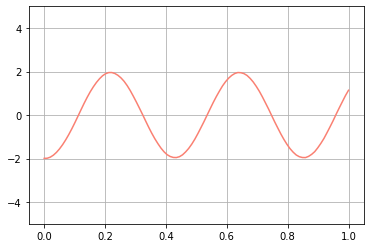

In [3]:
fig1 = plt.figure()
l = plt.plot(x, u[:,0], color = 'salmon')
axes = plt.gca()
axes.set_ylim([-5,5])
plt.grid()

def animate(i, line):
    line.set_data(x,u[:,i-1])
    return line,

ani = animation.FuncAnimation(fig1, animate, 1000, fargs = (l), interval = 50, blit = True)
ani.save('1Dwave.mp4', fps = 100, extra_args = ['-vcodec', 'libx264'])
plt.show()

___
### Homework 2.1.2 - 1D Wave with damping

Solve the wave equation

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} - k \frac{\partial u}{\partial t}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)**, **the frequency ($\omega$)**, and **the damping factor ($k$)** to make a nice time-animated graph video clip.

$$\frac{\partial^2u}{\partial t^2} = c^2\frac{\partial^2u}{\partial x^2} - k\frac{\partial u}{\partial t}$$

So we have 

$$ \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\delta^2} = c^2\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2} - k\frac{u_{i,j+1}-u_{i,j-1}}{2\delta}$$

Make $u_{i,j+1}$ the subject and we get (yeah, I go straight to the solution, I ain't typing the whole derivation 555)

$$u_{i,j+1} = \Bigg(\Big(\frac{2c^2\delta^2}{h^2}\Big)(u_{i+1,j}-2u_{i,j}+u_{i-1,j}) + 4u_{i,j} - 2u_{i,j-1} + k\delta u_{i,j-1} \Bigg)\cdot \frac{1}{2+k\delta}$$

In [4]:
# set up the x from 0 to 1
x = np.linspace(0, 1., num = 100)

# set nx and nt
nx = 100
nt = 1000

# time step 
dt = 1/nt
print('dt', dt)
# spatial step 
dh = 1/nx
print('dh', dh)

# c, freq(omega), k and epsilon
c = 2 # for simplicity...
omega = 30 # I'll come fix it later # A message from later version on myself : fixed
eps = (2*(dt*c/dh)**2)
k = 3 # for simplicity
print('eps', eps)
# eps is < 1, cool 

# set up the grid for u (the initial condition at time t = 0)
u = np.zeros((nx,nt))

# set boundary condition 
u[0,0] = 2*np.sin(omega*0*dt) # the 0 is the j --> because t_j is j*dt 


for j in range(1, nt-1):
    # boundary condition changes as t changes 
    # every time we are at the new timestep dt, there is a new boundary condition
    # so have to continue to update that 
    # This one is the feeding wave at x = 0, t = t
    u[0,j] = 2*np.sin(omega*dt*(j))
    # Now the open boundary condition 
    # Have to set this before changing any other value since it is the boundary contidion at x = L
    u[-1][j+1] = -c*(u[-1][j-1]-u[-2][j-1])*(2*dt/dh) + u[-1][j-1]
    for i in range(1, nx-1):
        # for iterating the step after the setting up the boundary condition at each time step
        u[i][j+1] = (eps*(u[i+1][j] - 2*u[i,j]+u[i-1,j])+ 4*u[i,j]-2*u[i,j-1]+k*dt*u[i,j-1])*(1/(2+k*dt))

dt 0.001
dh 0.01
eps 0.08000000000000002


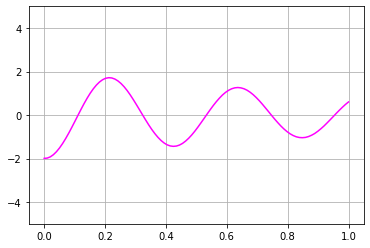

In [5]:
fig2 = plt.figure()
l = plt.plot(x, u[:,0], color = 'magenta')
axes = plt.gca()
axes.set_ylim([-5,5])
plt.grid()

def animate(i, line):
    line.set_data(x,u[:,i-1])
    return line,

ani = animation.FuncAnimation(fig2, animate, 1000, fargs = (l), interval = 50, blit = True)
ani.save('1DDampedwave.mp4', fps = 100, extra_args = ['-vcodec', 'libx264'])
plt.show()